
## Wks 7&8 Assignment

## Lincoln Brown

## DSC540-T301

## Professor Williams


In [56]:
# Import the packages I will use
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import re
import requests

pd.set_option('display.max_rows', 500)
pd.options.display.max_seq_items = 500

In [57]:
# Import the 2017 candy dataset
candy_url = 'https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchy2017.csv'

candy_r = requests.get(candy_url)
candy_out = 'candyhierchy2017.csv'
with open(candy_out, 'w') as candy_file:
    candy_file.writelines(candy_r.text)
    


In [58]:
# Create the 2017 candy dataframe
candy_2017_df = pd.read_csv(candy_out)
candy_2017_df.head(50)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
5,90272852,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"(75, 23)"
6,90272853,No,Male,53,usa,Colorado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,90272854,No,Male,33,canada,ontario,JOY,DESPAIR,JOY,DESPAIR,...,when the little kids get the big chocolate bar...,"first person to give out cans of beer, wins",Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(55, 5)"
8,90272858,No,Male,40,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,NaN,NaN,Blue and black,NaN,Sunday,NaN,1.0,NaN,NaN,"(76, 24)"
9,90272859,No,Female,53,Us,Wa,MEH,DESPAIR,JOY,MEH,...,NaN,NaN,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(70, 28)"



## Chapter 7

* Filter out missing data
* Fill in missing data
* Remove duplicates
* Transform data using either mapping or a function
* Replace values
* Discretization and Binning
* Manipulate Strings


## Ch.7 Method 1
## Filter out missing data
Remove the Unnamed: 113 column because it contains mostly NaNs. We will also remove rows that contain NaN for Country 

In [24]:
# Drop the Unnamed: 113 column since it is mostly NaN's
candy_2017_df.drop(columns=['Unnamed: 113'], inplace=True)
# Drop rows that contain NaN for Country
candy_2017_df.dropna(subset=['Q4: COUNTRY'], inplace=True)
print(candy_2017_df.shape)

(2396, 119)


In [25]:
# I want to understand the data that I'm working with better
# I'm going to clean up the column headers and then graph the top results
# All of the candy data columns start with Q6
candy_questions = [x for x in candy_2017_df.columns if x.__contains__("Q6")]
# Isolate the candy questions to a new df
candy_questions_df = candy_2017_df.loc[:,candy_questions]
# I want to get a count of each value for each candy
candy_questions_temp = candy_questions_df.apply(pd.value_counts, dropna=False)
# Strip out the Q6 from the header and clean up the values for output in graphs later
candy_questions_temp.columns = candy_questions_temp.columns.str.lstrip('Q6 | ')
candy_questions_temp.columns = candy_questions_temp.columns.str.replace("Õ", "'")

candy_questions_temp

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
JOY,861,175,1543,89,114,193,462,114,24,1163,...,1049,1306,226,1400,233,702,833,44,115,1094
MEH,748,456,207,613,853,710,661,470,105,456,...,509,345,678,280,286,240,502,203,306,413
NaN,703,690,629,908,939,954,718,643,662,639,...,664,661,663,646,746,742,776,712,702,660
DESPAIR,84,1075,17,786,490,539,555,1169,1605,138,...,174,84,829,70,1131,712,285,1437,1273,229


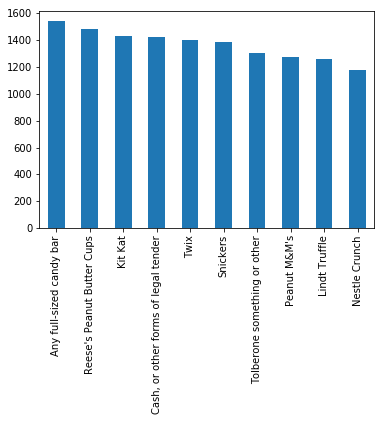

In [26]:
# I'll start by graphing the favorite candy
# We will isolate the Joy Series from the dataframe
favorites = candy_questions_temp.loc['JOY',:]
# I need to sort it to easily get the top 10 results
favorites.sort_values(ascending=False, inplace=True)
top_ten_joy = favorites.head(10)
# Plot the results
top_ten_joy.plot.bar()


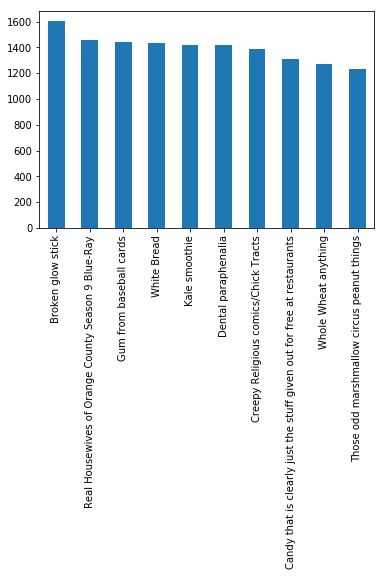

In [27]:
# Now for the most hated candy
hated = candy_questions_temp.loc['DESPAIR',:]
# Need to get the top 10 again
hated.sort_values(ascending=False, inplace=True)
top_ten_despair = hated.head(10)
top_ten_despair.plot.bar()


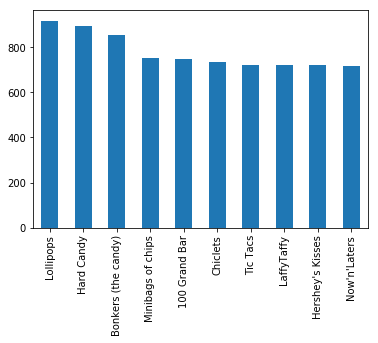

In [28]:
# I also thought it would be interesting to see the candy people were indifferent to
indifferent = candy_questions_temp.loc['MEH', :]
# Sort again to get top 10
indifferent.sort_values(ascending=False, inplace=True)
top_ten_meh = indifferent.head(10)
top_ten_meh.plot.bar()

## Ch.7 Method 2
## Discretization and Binning
Since we have an age column, we will break it out into bins


In [29]:
# Create a new dataframe so that we are not manipulating the original
age_df = candy_2017_df

# Create a regex pattern to clean up the columns.
# In this pattern I'm looking to eliminate the Q0-12, and the : or | that follow.
pattern = re.compile(r"(Q\d{1,2})(: | \| )")
# Use the str.column.replace method to delete the matched pattern
age_df.columns = age_df.columns.str.replace(pattern, "",)

# Have a look at our columns to see how they look
print(age_df.columns)


Index(['Internal ID', 'GOING OUT?', 'GENDER', 'AGE', 'COUNTRY',
       'STATE, PROVINCE, COUNTY, ETC', '100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       'Bonkers (the board game)', 'Bottle Caps', 'Box'o'Raisins',
       'Broken glow stick', 'Butterfinger', 'Cadbury Creme Eggs', 'Candy Corn',
       'Candy that is clearly just the stuff given out for free at restaurants',
       'Caramellos', 'Cash, or other forms of legal tender', 'Chardonnay',
       'Chick-o-Sticks (we donÕt know what that is)', 'Chiclets',
       'Coffee Crisp', 'Creepy Religious comics/Chick Tracts',
       'Dental paraphenalia', 'Dots', 'Dove Bars', 'Fuzzy Peaches',
       'Generic Brand Acetaminophen', 'Glow sticks', 'Goo Goo Clusters',
       'Good N' Plenty', 'Gum from baseball cards', 'Gummy Bears straight up',
       'Hard Candy', 'Healthy Fruit', 'Heath Bar', 'Hershey's D

In [30]:
# Now we need to eliminate any row that has an age that isn't a number
age_df.loc[:, 'AGE'] = pd.to_numeric(age_df.loc[:,'AGE'], errors='coerce')

print(age_df.loc[:, 'AGE'].unique())
# I noticed some values that fall outside of the expected range for a human life
# I will clean those up and only accept ages between 5 and 100
age_df = age_df.loc[(age_df['AGE'] > 5) & (age_df['AGE'] < 100)]
print(age_df.loc[:,'AGE'].unique())
age_bins = [1,18,30,60,100]
age_groups = ['Child','Young-Adult','Middle-Aged','Senior']
ages = pd.cut(age_df['AGE'], age_bins, labels=age_groups)
pd.value_counts(ages)

[  44.    49.    40.    23.    53.    33.    56.    64.    43.    37.
   59.    48.    54.    36.    45.    25.    34.    35.    38.    58.
   50.    47.    16.    52.    63.    65.    41.    27.    31.    61.
   46.    42.    62.    29.    39.    32.    28.    69.    67.    30.
   22.    26.    51.    70.    24.    18.     nan   19.    57.    60.
   66.    12.    55.    72.    21.    11.     9.    68.    20.     6.
   10.    71.    90.    13.   312.    99.     7.    88.    39.4   74.
  102.    17.    15.     8.    75.    14.    76.   100.  1000.    77.
   73.     1.     4. ]
[44.  49.  40.  23.  53.  33.  56.  64.  43.  37.  59.  48.  54.  36.
 45.  25.  34.  35.  38.  58.  50.  47.  16.  52.  63.  65.  41.  27.
 31.  61.  46.  42.  62.  29.  39.  32.  28.  69.  67.  30.  22.  26.
 51.  70.  24.  18.  19.  57.  60.  66.  12.  55.  72.  21.  11.   9.
 68.  20.   6.  10.  71.  90.  13.  99.   7.  88.  39.4 74.  17.  15.
  8.  75.  14.  76.  77.  73. ]


Middle-Aged    1845
Young-Adult     278
Senior          153
Child            64
Name: AGE, dtype: int64

## Chapter 8

* Create hierarchical index
* Combine and Merge Datasets (you will have to either create a new dataset from your existing data or create a relationship between the data I have provided)
* Reshape
* Pivot the data


## Ch. 8 Method 1
## Create a hierarchical index

We can use the Country and State, Province, County columns to create a hierarchical index

In [31]:
# Import the candy 2016 dataset
candy_2016_file = "BOING-BOING-CANDY-HIERARCHY-2016-SURVEY-Responses.xlsx"
candy_2016_df = pd.read_excel(candy_2016_file)
candy_2016_df

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).",[York Peppermint Patties] Ignore
0,2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,3 or higher,2,3 or higher,3 or higher,3 or higher,3 or higher,Friday,South to North,Science: Latest News and Headlines,NaN
1,2016-10-24 05:09:54.798,No,Male,45,usa,il,MEH,MEH,JOY,JOY,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,Science: Latest News and Headlines,NaN
2,2016-10-24 05:13:06.734,No,Female,48,US,Colorado,JOY,DESPAIR,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,East to West,Science: Latest News and Headlines,NaN
3,2016-10-24 05:14:17.192,No,Male,57,usa,il,JOY,MEH,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,South to North,Science: Latest News and Headlines,NaN
4,2016-10-24 05:14:24.625,Yes,Male,42,USA,South Dakota,MEH,DESPAIR,JOY,DESPAIR,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,ESPN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2016-10-29 16:53:52.516,No,Female,52,USA,TX,JOY,DESPAIR,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,2,3 or higher,Friday,East to West,Science: Latest News and Headlines,NaN
1255,2016-10-30 06:53:54.735,No,Male,33,united states,minnesota,JOY,DESPAIR,JOY,DESPAIR,...,"Actually, that's me.",3 or higher,3 or higher,3 or higher,3 or higher,"Actually, that's me.",Friday,Sinusoidally around the equator,Science: Latest News and Headlines,NaN
1256,2016-10-30 11:06:10.827,No,Male,NaN,NaN,NaN,JOY,MEH,JOY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,nne to east to nnw to s to n,Science: Latest News and Headlines,NaN
1257,2016-10-30 16:07:26.539,No,Male,48,canada,BC,NaN,DESPAIR,JOY,DESPAIR,...,1,2,3 or higher,3 or higher,2,3 or higher,Sunday,East to West,Science: Latest News and Headlines,NaN


In [32]:
# Create a hierarchical index of country and then state
hierarchical_df = candy_2016_df.copy()
hierarchical_df.index = [candy_2016_df['Which country do you live in?'], candy_2016_df['Which state, province, county do you live in?']]
hierarchical_df

Timestamp  \
Which country do you live in? Which state, province, county do you live in?                           
Canada                        Ontario                                       2016-10-24 05:09:23.033   
usa                           il                                            2016-10-24 05:09:54.798   
US                            Colorado                                      2016-10-24 05:13:06.734   
usa                           il                                            2016-10-24 05:14:17.192   
USA                           South Dakota                                  2016-10-24 05:14:24.625   
...                                                                                             ...   
                              TX                                            2016-10-29 16:53:52.516   
united states                 minnesota                                     2016-10-30 06:53:54.735   
NaN                           NaN                                           2016-10-30 11:06:10.827   
canada                        BC                                            2016-10-30 16:07:26.539   
Us                            Nh                                            2016-10-30 17:06:45.660   

                                                                            Are you going actually going trick or treating yourself?  \
Which country do you live in? Which state, province, county do you live in?                                                            
Canada                        Ontario                                                                                       No         
usa                           il                                                                                            No         
US                            Colorado                                                                                      No         
usa                           il                                                                                            No         
USA                           South Dakota                                                                                 Yes         
...                                                                                                                        ...         
                              TX                                                                                            No         
united states                 minnesota                                                                                     No         
NaN                           NaN                                                                                           No         
canada                        BC                                                                                            No         
Us                            Nh                                                                                           Yes         

                                                                            Your gender:  \
Which country do you live in? Which state, province, county do you live in?                
Canada                        Ontario                                               Male   
usa                           il                                                    Male   
US                            Colorado                                            Female   
usa                           il                                                    Male   
USA                           South Dakota                                          Male   
...                                                                                  ...   
                              TX                                                  Female   
united states                 minnesota                                             Male   
NaN                           NaN                            

## Ch. 8 Method 2
## Reshape the data
I am interested in making it easy to understand how each individual candy scored in ranking for JOY, MEH, DESPAIR and an overall score (calculated by taking JOY - DESPAIR).
To do this, I want to reshape the candy_questions_temp dataframe so that the columns are JOY, MEH, DESPAIR, and OVERALL and the rows are the individual candies.

In [59]:
# First I will do it with stack and unstack
# I will be using the candy_questions_temp dataframe I created earlier
candy_questions_temp

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
JOY,861,175,1543,89,114,193,462,114,24,1163,...,1049,1306,226,1400,233,702,833,44,115,1094
MEH,748,456,207,613,853,710,661,470,105,456,...,509,345,678,280,286,240,502,203,306,413
NaN,703,690,629,908,939,954,718,643,662,639,...,664,661,663,646,746,742,776,712,702,660
DESPAIR,84,1075,17,786,490,539,555,1169,1605,138,...,174,84,829,70,1131,712,285,1437,1273,229


In [34]:
# From the output above, we can see the individual scores, but I want the columns to 
# be JOY, MEH, DESPAIR, and OVERALL - Not individual candies
candy_questions_stack = candy_questions_temp.stack()
candy_questions_stack
# From the output below, we can see that we are closer. 
# We now have a Pandas series that has each individual candy separated by the three emotions

JOY      100 Grand Bar                                                                         861
         Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     175
         Any full-sized candy bar                                                             1543
         Black Jacks                                                                            89
         Bonkers (the candy)                                                                   114
         Bonkers (the board game)                                                              193
         Bottle Caps                                                                           462
         Box'o'Raisins                                                                         114
         Broken glow stick                                                                      24
         Butterfinger                                                                         1163
         C

In [35]:
# To get the final result, we need to unstack on the 0 axis, to break out each row
# and make a new dataframe
# We will also rename the index to CANDY
candy_questions_reshaped = candy_questions_stack.unstack(0)
candy_questions_reshaped.index.names = ['CANDY']
candy_questions_reshaped


,JOY,MEH,NaN,DESPAIR
CANDY,,,,
100 Grand Bar,861,748,703,84
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),175,456,690,1075
Any full-sized candy bar,1543,207,629,17
Black Jacks,89,613,908,786
Bonkers (the candy),114,853,939,490
Bonkers (the board game),193,710,954,539
Bottle Caps,462,661,718,555
Box'o'Raisins,114,470,643,1169
Broken glow stick,24,105,662,1605


In [36]:
# All that is left is to create our final column and sort on it
candy_questions_reshaped.loc[:,'OVERALL'] = candy_questions_reshaped.loc[:,'JOY'] - candy_questions_reshaped.loc[:,'DESPAIR']
candy_questions_reshaped.sort_values(by='OVERALL', ascending=False, inplace=True)
candy_questions_reshaped

,JOY,MEH,NaN,DESPAIR,OVERALL
CANDY,,,,,
Any full-sized candy bar,1543,207,629,17,1526
Reese's Peanut Butter Cups,1480,186,637,93,1387
Kit Kat,1429,284,631,52,1377
"Cash, or other forms of legal tender",1424,271,636,65,1359
Twix,1400,280,646,70,1330
Snickers,1383,287,647,79,1304
Tolberone something or other,1306,345,661,84,1222
Lindt Truffle,1261,365,674,96,1165
Peanut M&M's,1277,372,628,119,1158


## Chapter 10

   * Grouping with Dicts/Series
   * Grouping with Functions
   * Grouping with Index Levels
   * Split/Apply/Combine
   * Cross Tabs


## Ch. 10 Method 1
## Group with Function
We will create a hierarchical index using Age and Gender and then group by the mean age for each gender

In [37]:
# Create a copy of the 2016 dataset
ages_gender_2016 = candy_2016_df.copy()

# Create an age column and clean it for coercing to a numeric type
ages_gender_2016['AGE'] = ages_gender_2016['How old are you?'].astype(str).str.extract(r'(\d\d)')
ages_gender_2016.loc[:,'AGE'] = pd.to_numeric(ages_gender_2016.loc[:, 'AGE'], errors='coerce')

# Create a Gender column
ages_gender_2016.loc[:,'GENDER'] = ages_gender_2016.loc[:, 'Your gender:']

# Groupy by gender and apply the mean function to the Age column
ages_gender_2016[['GENDER', 'AGE']].groupby('GENDER').mean()


,AGE
GENDER,
Female,38.399491
I'd rather not say,38.000000
Male,42.049803
Other,33.176471


We can see that the average age of males is slightly older at 42 than females at 38

## Ch. 10 Method 2
## Create a Crosstab
We will use the Gender and Website columns to look for differences in the website choices for each gender

In [64]:
# Create a copy of the 2016 candy dataframe
gender_website_df = candy_2016_df.copy()
# Create a new columns named GENDER and WEBSITE that are easier to use
gender_website_df.loc[:,'GENDER'] = gender_website_df.loc[:, 'Your gender:']
gender_website_df.loc[:, 'WEBSITE'] = gender_website_df.loc[:,'When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).']


In [66]:
# Use the new columns to create a crosstab to see which website was the most popular for each gender
gender_website_crosstab = pd.crosstab(gender_website_df['GENDER'], gender_website_df['WEBSITE'], margins=True)
gender_website_crosstab

WEBSITE,Daily Dish,ESPN,Science: Latest News and Headlines,YAHOO! Finance.,All
GENDER,,,,,
Female,47,15,326,10,398
I'd rather not say,1,3,22,0,26
Male,28,77,641,29,775
Other,1,0,13,2,16
All,77,95,1002,41,1215


From the results above, we can see that all genders preferred the Science: Latest News and Headlines website over the others.

## Chapter 11

* Convert between string and date time
* Generate date range
* Frequencies and date offsets
* Convert timestamps to periods and back
* Period Frequency conversions

## Ch. 11 Method 1
## Convert between string and date time
We will use the 2015 candy dataset to convert the time stamp to a datatime

In [68]:
# Import the 2015 candy dataset
candy_2015_file = "CANDY-HIERARCHY-2015-SURVEY-Responses.xlsx"
candy_2015_df = pd.read_excel(candy_2015_file)
candy_2015_df.head(50)

,Timestamp,How old are you?,Are you going actually going trick or treating yourself?,[Butterfinger],[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers],[Bottle Caps],...,[Necco Wafers],"Which day do you prefer, Friday or Sunday?",Please estimate the degrees of separation you have from the following folks [Bruce Lee],Please estimate the degrees of separation you have from the following folks [JK Rowling],Please estimate the degrees of separation you have from the following folks [Malala Yousafzai],Please estimate the degrees of separation you have from the following folks [Thom Yorke],Please estimate the degrees of separation you have from the following folks [JJ Abrams],Please estimate the degrees of separation you have from the following folks [Hillary Clinton],Please estimate the degrees of separation you have from the following folks [Donald Trump],Please estimate the degrees of separation you have from the following folks [Beyoncé Knowles]
0,2015-10-23 08:46:20.451,35,No,JOY,NaN,DESPAIR,JOY,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-10-23 08:46:51.583,41,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-23 08:47:34.285,33,No,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-23 08:47:58.964,31,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-23 08:48:11.719,30,No,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-10-23 08:49:06.808,38,No,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,...,JOY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-10-23 08:50:08.918,48,No,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-10-23 08:52:14.267,39,No,DESPAIR,JOY,DESPAIR,NaN,NaN,NaN,JOY,...,JOY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-10-23 08:52:22.112,89999999999999995805696,Yes,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-10-23 08:53:30.967,54,No,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,...,JOY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Copy the candy_2015_df 
timestamp_2015_df = candy_2015_df.copy()
# Ensure that Timestamp column is a string and then convert it to a datetime
timestamp_2015_df['Timestamp'] = timestamp_2015_df['Timestamp'].astype('string')
print(timestamp_2015_df['Timestamp'].dtype)
timestamp_2015_df['Timestamp'] = pd.to_datetime(timestamp_2015_df['Timestamp'], errors='coerce')
# Confirm data type for Timestamp
print(timestamp_2015_df['Timestamp'].dtype)

string
datetime64[ns]


In [70]:
# Set the timestamp column as the dataframe index
timestamp_2015_df.set_index('Timestamp', inplace=True)
timestamp_2015_df

,How old are you?,Are you going actually going trick or treating yourself?,[Butterfinger],[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers],[Bottle Caps],[Box’o’ Raisins],...,[Necco Wafers],"Which day do you prefer, Friday or Sunday?",Please estimate the degrees of separation you have from the following folks [Bruce Lee],Please estimate the degrees of separation you have from the following folks [JK Rowling],Please estimate the degrees of separation you have from the following folks [Malala Yousafzai],Please estimate the degrees of separation you have from the following folks [Thom Yorke],Please estimate the degrees of separation you have from the following folks [JJ Abrams],Please estimate the degrees of separation you have from the following folks [Hillary Clinton],Please estimate the degrees of separation you have from the following folks [Donald Trump],Please estimate the degrees of separation you have from the following folks [Beyoncé Knowles]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-10-23 08:46:20.451,35,No,JOY,NaN,DESPAIR,JOY,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-23 08:46:51.583,41,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-23 08:47:34.285,33,No,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-23 08:47:58.964,31,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-23 08:48:11.719,30,No,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-31 05:23:40.526,50,No,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,...,DESPAIR,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-31 05:29:26.937,43,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-31 06:13:29.083,35,Yes,NaN,JOY,DESPAIR,JOY,NaN,NaN,DESPAIR,NaN,...,NaN,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ch. 11 Method 2 
## Generate a date range
We will create a daily date range using the 2015 candy dataset

In [73]:
# Create a new date range of the 2015 dataframe using a daily period
date_range = pd.date_range(start=timestamp_2015_df.index.min(), end=timestamp_2015_df.index.max(), freq='D')
date_range

DatetimeIndex(['2015-10-23 08:46:20.451000', '2015-10-24 08:46:20.451000',
               '2015-10-25 08:46:20.451000', '2015-10-26 08:46:20.451000',
               '2015-10-27 08:46:20.451000', '2015-10-28 08:46:20.451000',
               '2015-10-29 08:46:20.451000', '2015-10-30 08:46:20.451000'],
              dtype='datetime64[ns]', freq='D')

From the results above we can see that the range is from October 23, 2015 to October 30, 2015. 

## Ch. 11 Method 3
## Convert timestamps to period and back

In [71]:
# Create a new column to hold the period information in the 2015 dataframe
timestamp_2015_df['Period'] = timestamp_2015_df.index.to_period("D")
print(timestamp_2015_df.loc[:, ['Period']])

                             Period
Timestamp                          
2015-10-23 08:46:20.451  2015-10-23
2015-10-23 08:46:51.583  2015-10-23
2015-10-23 08:47:34.285  2015-10-23
2015-10-23 08:47:58.964  2015-10-23
2015-10-23 08:48:11.719  2015-10-23
...                             ...
2015-10-31 05:23:40.526  2015-10-31
2015-10-31 05:29:26.937  2015-10-31
2015-10-31 06:13:29.083  2015-10-31
2015-10-31 06:26:52.566  2015-10-31
2015-10-31 06:41:31.904  2015-10-31

[5630 rows x 1 columns]


In [74]:
# Create a new column to conver the period data back to a timestamp
timestamp_2015_df['Period_to_Timestamp'] = timestamp_2015_df['Period'].dt.to_timestamp()
print(timestamp_2015_df.loc[:, ['Period', 'Period_to_Timestamp']])
# Print the datatypes of each column to show the difference
print(timestamp_2015_df.loc[:, ['Period', 'Period_to_Timestamp']].dtypes)

                             Period Period_to_Timestamp
Timestamp                                              
2015-10-23 08:46:20.451  2015-10-23          2015-10-23
2015-10-23 08:46:51.583  2015-10-23          2015-10-23
2015-10-23 08:47:34.285  2015-10-23          2015-10-23
2015-10-23 08:47:58.964  2015-10-23          2015-10-23
2015-10-23 08:48:11.719  2015-10-23          2015-10-23
...                             ...                 ...
2015-10-31 05:23:40.526  2015-10-31          2015-10-31
2015-10-31 05:29:26.937  2015-10-31          2015-10-31
2015-10-31 06:13:29.083  2015-10-31          2015-10-31
2015-10-31 06:26:52.566  2015-10-31          2015-10-31
2015-10-31 06:41:31.904  2015-10-31          2015-10-31

[5630 rows x 2 columns]
Period                      period[D]
Period_to_Timestamp    datetime64[ns]
dtype: object
